In [1]:
import time
from collections import namedtuple
try:
    from skimage import io as skimage_io
except:
    !pip install scikit-image
    from skimage import io as skimage_io
from self_fourier_shell_correlation import fsc_utils as fsc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Args = namedtuple("args", ["input", "input1", "input2", "input3", "input4"])
args = Args("http://www.hpca.ual.es/~vruiz/images/TwoPhoton_MICE.png",
            "http://www.hpca.ual.es/~vruiz/images/TwoPhoton_MICE_1.png",
            "http://www.hpca.ual.es/~vruiz/images/TwoPhoton_MICE_2.png",
            "http://www.hpca.ual.es/~vruiz/images/TwoPhoton_MICE_3.png",
            "http://www.hpca.ual.es/~vruiz/images/TwoPhoton_MICE_4.png"
           )

In [3]:
X = skimage_io.imread(args.input)  # Ground Truth
X1 = skimage_io.imread(args.input1)  # Noisy instance 1
X2 = skimage_io.imread(args.input2)  # Noisy instance 2
X3 = skimage_io.imread(args.input3)  # Noisy instance 3
X4 = skimage_io.imread(args.input4)  # Noisy instance 4

In [4]:
freq, SCBS_c_avg = fsc.get_SFRC_curve__subsampled_chessboard(X1)
len(freq)

compute_fourier_shell_correlation.shape=(256, 256)
compute_fourier_shell_correlation.shape=(256, 256)


128

In [5]:
r = X1.shape[0] // 2
voxel = 1
freq = fsc.get_radial_spatial_frequencies(X1, voxel, mode='full')
sfsc = np.mean(fsc.single_image_frc(X1, r), axis=0)
sfsc_adjusted = 2*sfsc / (1 + sfsc)
_, c_avg = fsc.get_SFRC_curve__even_odd(X1)

compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)


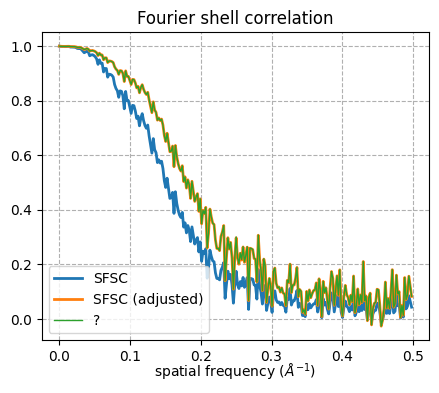

In [6]:
cmap_a = [plt.get_cmap('tab20c').colors[idx] for idx in [0, 4, 8, 12]]
cmap_b = [plt.get_cmap('tab20c').colors[idx] for idx in [2, 6, 10, 12]]
plt.figure(figsize=(5,4))
plt.plot(freq, sfsc, linewidth=2, label='SFSC')
plt.plot(freq, sfsc_adjusted, linewidth=2, label='SFSC (adjusted)')
plt.plot(freq, c_avg, linewidth=1, label='?')
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.grid(which='major', linestyle='--')
plt.xlabel('spatial frequency 'r'(${\AA}^{-1}$)', labelpad=-1.5)
plt.title('Fourier shell correlation')
plt.legend(loc='lower left')
# plt.savefig('')
plt.show()

In [7]:
freq, EOS_c_avg = fsc.get_SFRC_curve__even_odd(X1)
len(freq)

compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)


256

In [8]:
freq, CBS_c_avg = fsc.get_SFRC_curve__chessboard(X1)

compute_fourier_shell_correlation.shape=(512, 512)


In [9]:
freq, ICBS_c_avg = fsc.get_SFRC_curve__interpolated_chessboard(X1)

compute_fourier_shell_correlation.shape=(512, 512)


In [10]:
freq, SPRS1_c_avg = fsc.get_SFRC_curve__SPRS1(X1)

compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)


In [11]:
freq, SPRS2_c_avg = fsc.get_SFRC_curve__SPRS2(X1)

compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)


In [12]:
SCBS_freq, SCBS_c_avg = fsc.get_SFRC_curve__subsampled_chessboard(X1)
print(len(freq), len(SCBS_c_avg))

compute_fourier_shell_correlation.shape=(256, 256)
compute_fourier_shell_correlation.shape=(256, 256)
256 128


In [13]:
FRC_freq, FRC_c_avg_1 = fsc.get_FSC_curve(X1, X2)
FRC_freq, FRC_c_avg_2 = fsc.get_FSC_curve(X3, X4)
FRC_c_avg = (FRC_c_avg_1 + FRC_c_avg_2) / 2

compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)


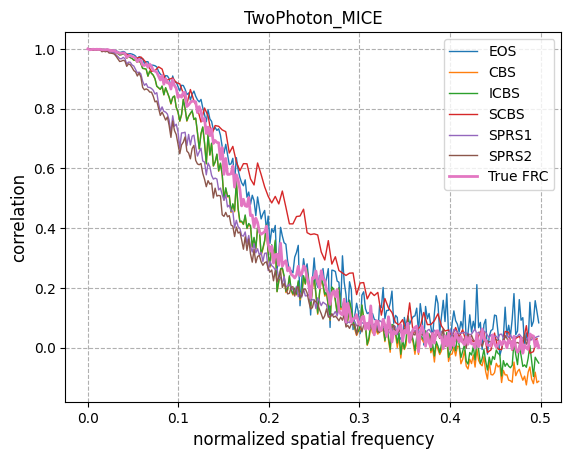

In [14]:
plt.plot(freq, EOS_c_avg, linewidth=1, label="EOS")
plt.plot(freq, CBS_c_avg, linewidth=1, label="CBS")
plt.plot(freq, ICBS_c_avg, linewidth=1, label="ICBS")
plt.plot(SCBS_freq, SCBS_c_avg, linewidth=1, label="SCBS")
plt.plot(freq, SPRS1_c_avg, linewidth=1, label="SPRS1")
plt.plot(freq, SPRS2_c_avg, linewidth=1, label="SPRS2")
plt.plot(freq, FRC_c_avg, linewidth=2, label="True FRC")
plt.grid(which="major", linestyle="--")
plt.xlabel("normalized spatial frequency")
plt.ylabel("correlation")
plt.title("TwoPhoton_MICE")
plt.legend()
plt.savefig('TwoPhoton_MICE_SFRC.pdf', bbox_inches='tight')
plt.show()